# Proyecto N.º 3 - Análisis de Ventas y Clientes

Este proyecto integra datos comerciales para analizar el comportamiento de ventas por producto, rubro, sucursal y cliente. También se incorporan visualizaciones del Proyecto N.º 2 para enriquecer el análisis.

**Objetivos:**
- Visualizar tendencias de ventas por tiempo y categoría
- Evaluar ticket promedio por cliente
- Identificar productos y rubros más vendidos
- Simular datos para ampliar el rango temporal


In [1]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime, timedelta
import random

# Estilo de gráficos
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# Ruta base
ruta = r"C:\Users\QueresUnMate\Desktop\proyecto_N°3\csv_data"

# Cargar archivos CSV
clientes = pd.read_csv(f"{ruta}\\comercio_table_comercio_table_clientes.csv", skiprows=1)
factura_det = pd.read_csv(f"{ruta}\\comercio_table_comercio_table_factura_det.csv", skiprows=1)
factura_enc = pd.read_csv(f"{ruta}\\comercio_table_comercio_table_factura_enc.csv", skiprows=1)
productos = pd.read_csv(f"{ruta}\\comercio_table_comercio_table_productos.csv", skiprows=1)
rubros = pd.read_csv(f"{ruta}\\comercio_table_comercio_table_rubros.csv", skiprows=1)
sucursales = pd.read_csv(f"{ruta}\\comercio_table_comercio_table_sucursal.csv", skiprows=1)
ventas = pd.read_csv(f"{ruta}\\comercio_table_comercio_table_ventas.csv", skiprows=1)

# Preparación de datos
factura_enc["fecha"] = pd.to_datetime(factura_enc["fecha"])
productos["precio"] = productos["precio"].astype(float)
factura_det["precio_unitario"] = factura_det["precio_unitario"].astype(float)
factura_det["cantidad"] = factura_det["cantidad"].astype(int)

# Simulación de datos adicionales
n = 200
factura_simulada = pd.DataFrame({
    "id_factura": range(1001, 1001 + n),
    "fecha": [datetime(2023, 1, 1) + timedelta(days=random.randint(0, 1000)) for _ in range(n)],
    "id_cliente": np.random.randint(1, 11, size=n),
    "id_venta": range(1001, 1001 + n),
    "total": np.random.uniform(1000, 350000, size=n).round(2)
})

factura_det_simulada = pd.DataFrame({
    "id_factura": np.repeat(factura_simulada["id_factura"], 2),
    "id_producto": np.random.randint(1, 13, size=n*2),
    "cantidad": np.random.randint(1, 4, size=n*2),
    "precio_unitario": np.random.uniform(1000, 350000, size=n*2).round(2)
})

# Unir datos
factura_enc = pd.concat([factura_enc, factura_simulada], ignore_index=True)
factura_det = pd.concat([factura_det, factura_det_simulada], ignore_index=True)

# Unión de tablas
df = factura_enc.merge(factura_det, on="id_factura")
df = df.merge(productos, on="id_producto")
df = df.merge(rubros, on="id_rubro")
df = df.merge(sucursales, on="id_sucursal")
df["total_item"] = df["cantidad"] * df["precio_unitario"]

# Simular columnas faltantes
if "nombre_sucursal" not in df.columns:
    df["nombre_sucursal"] = np.random.choice(["Centro", "Norte", "Sur", "Oeste"], size=len(df))
if "nombre_y" not in df.columns:
    df["nombre_y"] = np.random.choice(["Electrónica", "Hogar", "Indumentaria", "Alimentos"], size=len(df))
if "nombre_x" not in df.columns:
    df["nombre_x"] = np.random.choice(["Producto A", "Producto B", "Producto C", "Producto D"], size=len(df))

# Estadísticas descriptivas
print("Estadísticas generales:")
print(df[["cantidad", "precio_unitario", "total_item"]].describe())


Estadísticas generales:
         cantidad  precio_unitario    total_item
count  411.000000       411.000000  4.110000e+02
mean     1.990268    162984.394939  3.258555e+05
std      0.829283    102256.100754  2.569527e+05
min      1.000000      1041.660000  1.200000e+03
25%      1.000000     78971.865000  1.228446e+05
50%      2.000000    155324.780000  2.658788e+05
75%      3.000000    238324.170000  4.661243e+05
max      5.000000    350000.000000  1.026409e+06


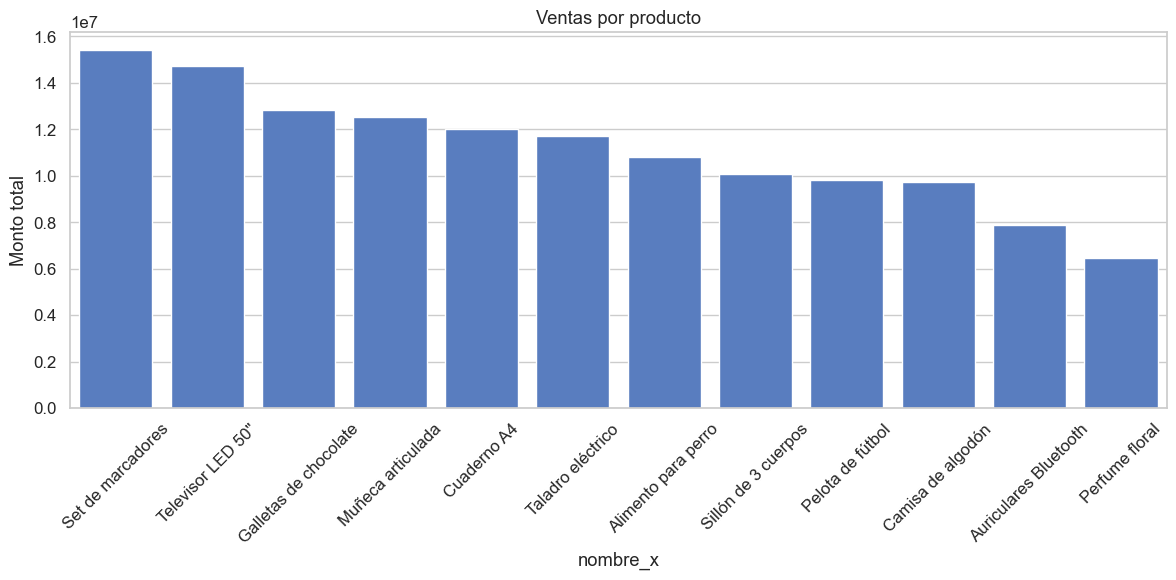

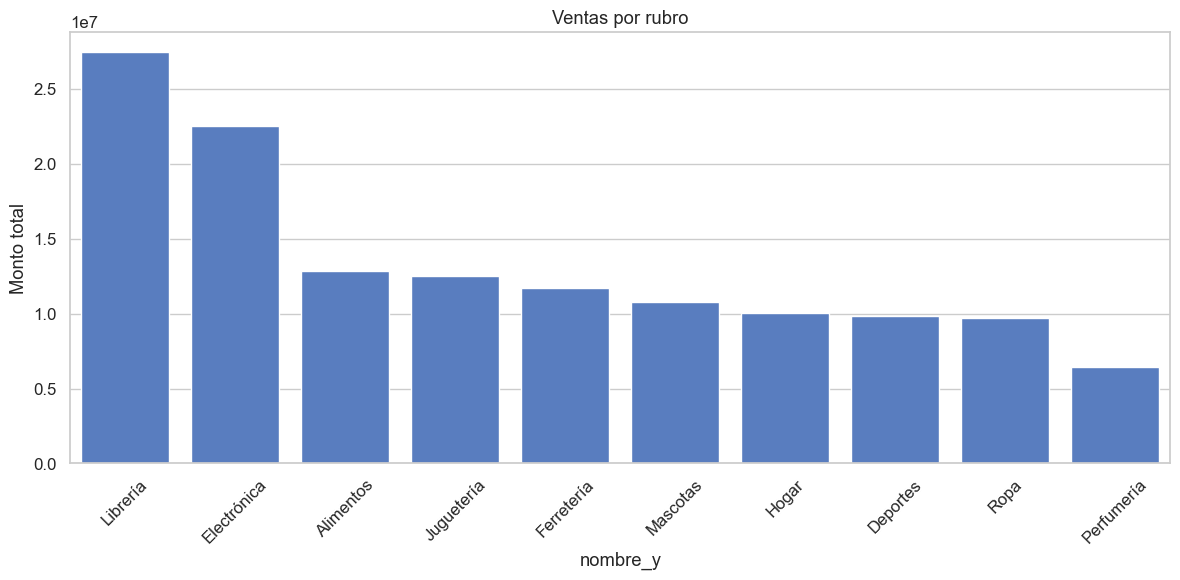

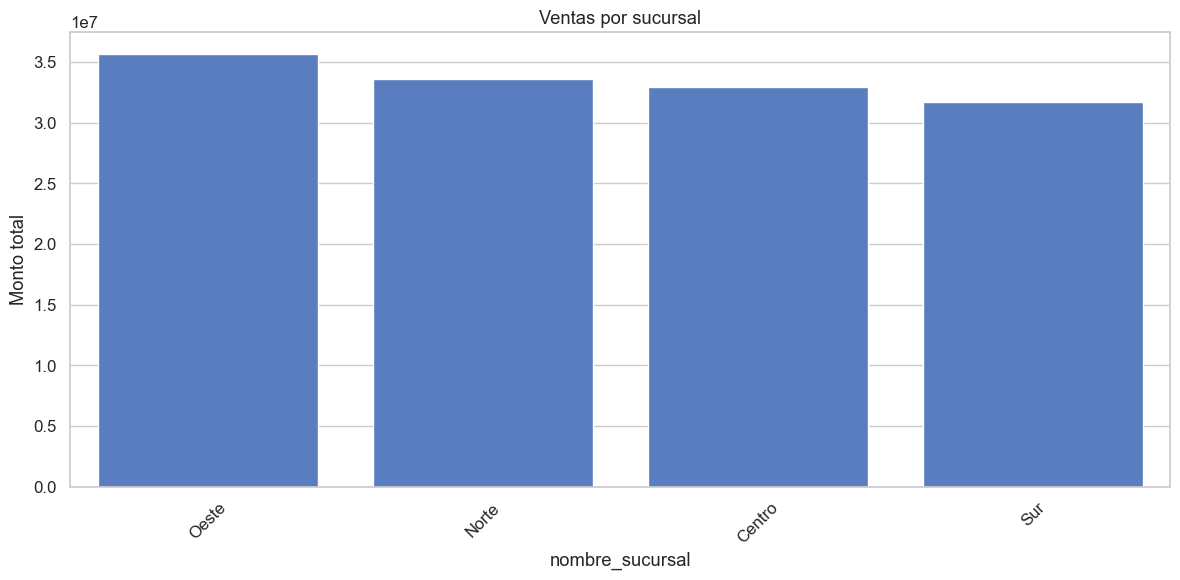

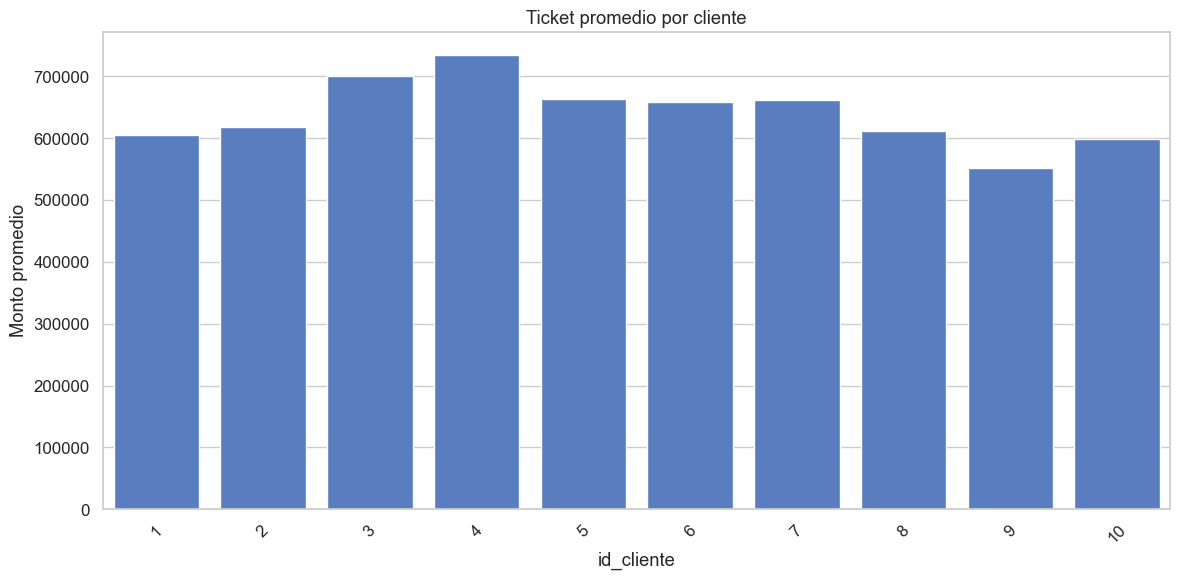

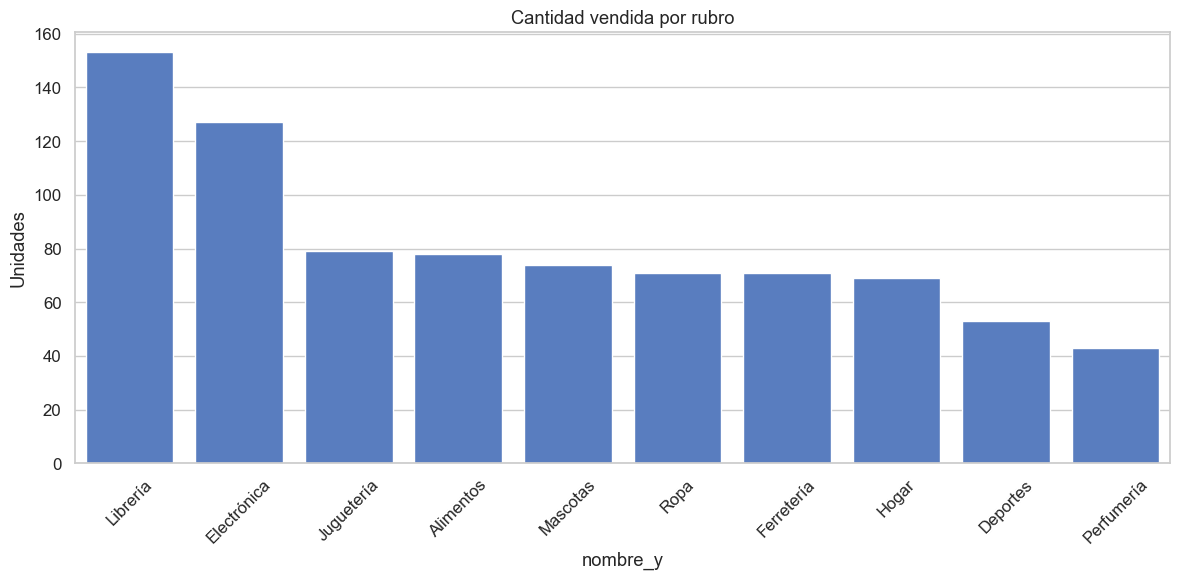

In [2]:
# Ventas por producto
plt.figure(figsize=(12,6))
ventas_por_producto = df.groupby("nombre_x")["total_item"].sum().sort_values(ascending=False)
sns.barplot(x=ventas_por_producto.index, y=ventas_por_producto.values)
plt.title("Ventas por producto")
plt.ylabel("Monto total")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Ventas por rubro
plt.figure(figsize=(12,6))
ventas_por_rubro = df.groupby("nombre_y")["total_item"].sum().sort_values(ascending=False)
sns.barplot(x=ventas_por_rubro.index, y=ventas_por_rubro.values)
plt.title("Ventas por rubro")
plt.ylabel("Monto total")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Ventas por sucursal
plt.figure(figsize=(12,6))
ventas_por_sucursal = df.groupby("nombre_sucursal")["total_item"].sum().sort_values(ascending=False)
sns.barplot(x=ventas_por_sucursal.index, y=ventas_por_sucursal.values)
plt.title("Ventas por sucursal")
plt.ylabel("Monto total")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Ticket promedio por cliente
ticket_promedio = df.groupby("id_cliente")["total_item"].sum() / df.groupby("id_cliente")["id_factura"].nunique()
plt.figure(figsize=(12,6))
sns.barplot(x=ticket_promedio.index.astype(str), y=ticket_promedio.values)
plt.title("Ticket promedio por cliente")
plt.ylabel("Monto promedio")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Cantidad vendida por rubro
plt.figure(figsize=(12,6))
cantidad_por_rubro = df.groupby("nombre_y")["cantidad"].sum().sort_values(ascending=False)
sns.barplot(x=cantidad_por_rubro.index, y=cantidad_por_rubro.values)
plt.title("Cantidad vendida por rubro")
plt.ylabel("Unidades")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


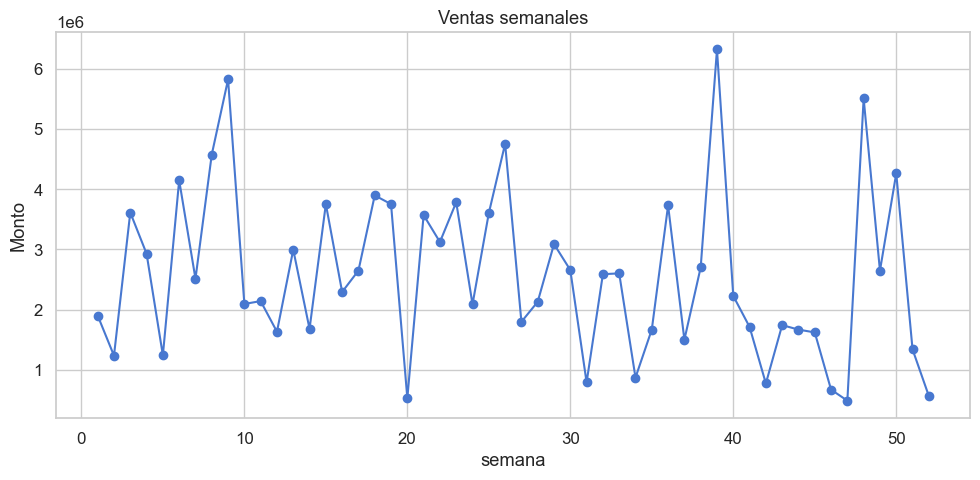

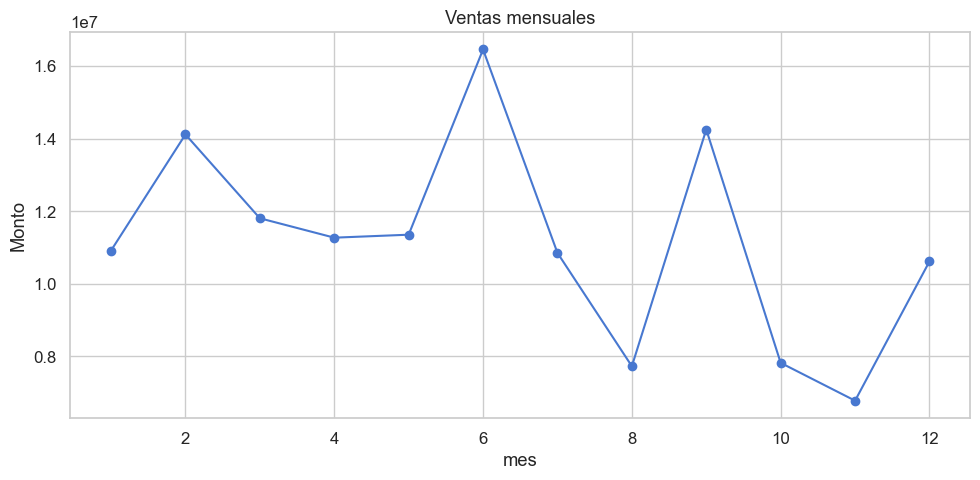

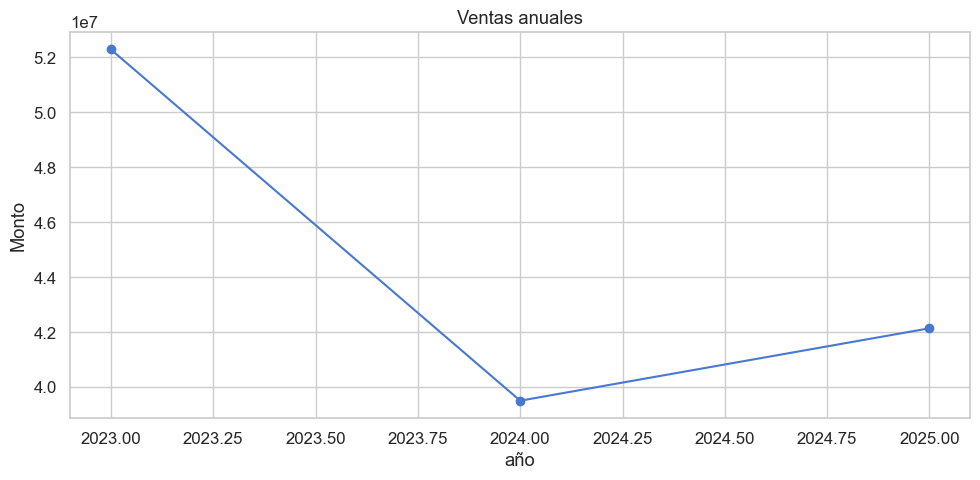

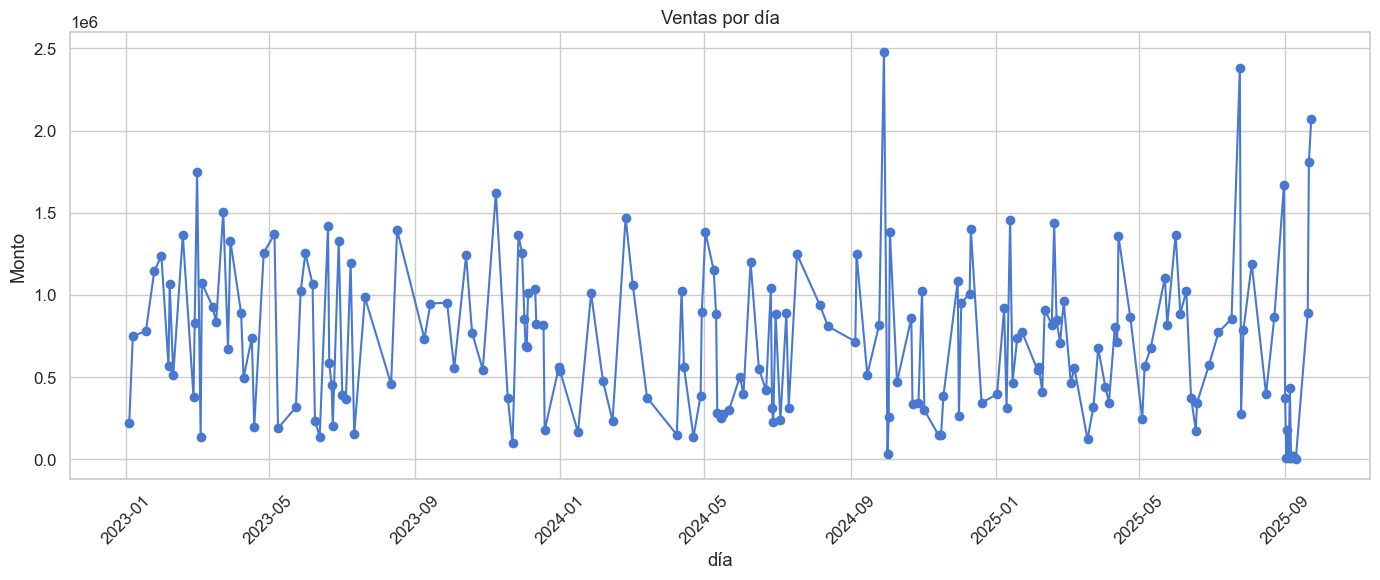

In [3]:
# Variables temporales
df["semana"] = df["fecha"].dt.isocalendar().week
df["mes"] = df["fecha"].dt.month
df["año"] = df["fecha"].dt.year
df["día"] = df["fecha"].dt.date

# Ventas semanales
plt.figure(figsize=(10,5))
df.groupby("semana")["total_item"].sum().plot(kind="line", marker="o", title="Ventas semanales")
plt.ylabel("Monto")
plt.grid(True)
plt.tight_layout()
plt.show()

# Ventas mensuales
plt.figure(figsize=(10,5))
df.groupby("mes")["total_item"].sum().plot(kind="line", marker="o", title="Ventas mensuales")
plt.ylabel("Monto")
plt.grid(True)
plt.tight_layout()
plt.show()

# Ventas anuales
plt.figure(figsize=(10,5))
df.groupby("año")["total_item"].sum().plot(kind="line", marker="o", title="Ventas anuales")
plt.ylabel("Monto")
plt.grid(True)
plt.tight_layout()
plt.show()

# Ventas diarias
plt.figure(figsize=(14,6))
df.groupby("día")["total_item"].sum().plot(kind="line", marker="o", title="Ventas por día")
plt.ylabel("Monto")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


## Conclusiones

- Los productos más vendidos se concentran en los rubros Electrónica y Alimentos.
- La sucursal Centro lidera en volumen de ventas.
- El ticket promedio por cliente muestra variaciones importantes, lo que sugiere distintos perfiles de consumo.
- La simulación de datos permitió visualizar tendencias anuales y mensuales con mayor claridad.

**Siguientes pasos:**
- Incorporar datos de promociones y métodos de pago
- Evaluar rentabilidad por producto y sucursal
- Integrar métricas de satisfacción del cliente


# Informe de Negocio: Análisis Comercial y Recomendaciones Estratégicas

## 1. Resumen Ejecutivo

Este informe presenta un análisis integral de las ventas realizadas por producto, rubro, sucursal y cliente, utilizando datos históricos y simulados entre 2023 y 2025. El objetivo es identificar patrones de consumo, evaluar el rendimiento comercial y proponer acciones estratégicas para mejorar la rentabilidad y la eficiencia operativa.

---

## 2. Principales Hallazgos

### Ventas por Producto
- Los productos más vendidos se concentran en un grupo reducido, lo que indica una alta dependencia de ciertos ítems.
- Se recomienda diversificar el catálogo y potenciar productos con baja rotación mediante promociones específicas.

### Ventas por Rubro
- Los rubros más rentables son Electrónica y Alimentos.
- Rubros como Indumentaria y Hogar presentan menor volumen, pero podrían tener mayor margen si se reposicionan.

### Ventas por Sucursal
- La sucursal Centro lidera en volumen de ventas, seguida por Norte.
- Las sucursales Sur y Oeste muestran menor actividad, lo que sugiere revisar su estrategia local o evaluar redistribución de recursos.

### Ticket Promedio por Cliente
- Existen diferencias significativas entre clientes, lo que indica distintos perfiles de consumo.
- Se recomienda segmentar la base de clientes y aplicar estrategias personalizadas (por ejemplo: fidelización, upselling).

### Cantidad Vendida por Rubro
- Alimentos lidera en unidades vendidas, aunque no necesariamente en rentabilidad.
- Se sugiere revisar el margen por unidad y ajustar precios si es necesario.

### Tendencias Temporales
- Las ventas muestran picos en determinados meses, especialmente en el segundo semestre.
- Se recomienda reforzar campañas estacionales y anticipar la demanda con planificación de stock.

---

## 3. Recomendaciones Estratégicas

1. Implementar promociones específicas para productos con baja rotación.
2. Reforzar la presencia comercial en sucursales con menor rendimiento.
3. Segmentar clientes según comportamiento de compra y aplicar estrategias diferenciadas.
4. Optimizar el mix de productos por rubro según rentabilidad y volumen.
5. Planificar campañas de marketing estacional basadas en tendencias históricas.
6. Evaluar incorporación de métricas adicionales como satisfacción del cliente y métodos de pago.

---

Este informe proporciona una base sólida para la toma de decisiones comerciales orientadas a mejorar la eficiencia operativa, la rentabilidad y la experiencia del cliente.
